In [10]:
# type: ignore
import pickle
from collections import Counter

import nltk
import numpy as np
import pyphen
import regex as re
import seaborn as sns
from matplotlib import pyplot as plt

from utils import level_to_cefr

In [3]:
with open("data/corrected.PKL", "rb") as f:
    data = pickle.load(f)
data = data[["level", "nationality", "grade", "corrected"]]
data = data[data["grade"] > 60]

In [ ]:
data["cefr"] = data["level"].ap

Text(0.5, 1.0, 'CEFR level distribution')

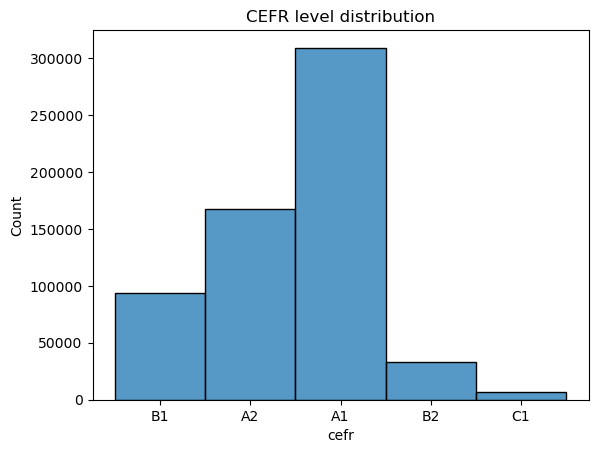

In [ ]:
ply(level_to_cefr)
sns.histplot(data, x="cefr")
plt.title("CEFR level distribution")

Text(0.5, 1.0, 'Grade distribution')

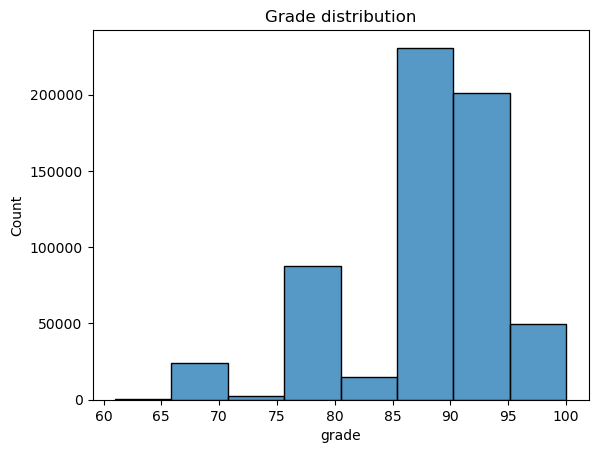

In [5]:
sns.histplot(data, x="grade", binwidth=5)
plt.title("Grade distribution")

In [6]:
def split_words_from_text(text: str) -> list[str]:
    return [w.lower() for w in re.findall(r"(\b\p{L}+\b)", text)]


def estimate_number_of_syllables_in_word_pyphen(word: str) -> int:
    dic = pyphen.Pyphen(lang="en")
    return len(dic.positions(word)) + 1


def syllables_per_word(words: list[str]) -> float:
    return sum(
        estimate_number_of_syllables_in_word_pyphen(word) * freq
        for word, freq in Counter(words).items()
    ) / len(words)


data["words"] = data["corrected"].apply(split_words_from_text)
data["number_of_words"] = data["words"].apply(len)
data["syllables_per_word"] = data["words"].apply(syllables_per_word)
data["number_of_sentences"] = data["corrected"].apply(
    lambda x: len(nltk.sent_tokenize(x))
)
data["sentence_length"] = data["number_of_words"] / data["number_of_sentences"]
print("Average number of sentences: ", round(np.average(data["number_of_sentences"]), 2))
print("Average sentence length: ", round(np.average(data["sentence_length"]), 2))
print("Median sentence length: ", round(np.median(data["sentence_length"]), 2))

Average number of sentences:  5.75
Average sentence length:  13.34
Median sentence length:  10.43


<Axes: xlabel='sentence_length', ylabel='Count'>

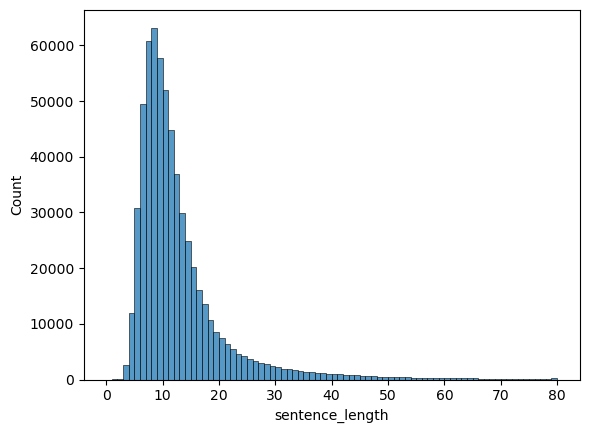

In [7]:
sns.histplot(data, x="sentence_length", binrange=(0, 80), binwidth=1)

<Axes: xlabel='syllables_per_word', ylabel='Count'>

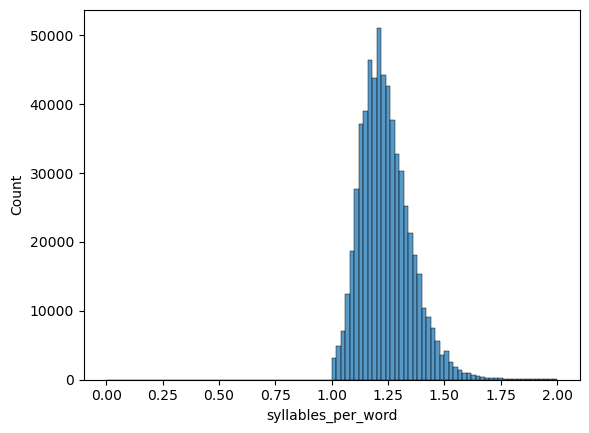

In [8]:
sns.histplot(data, x="syllables_per_word", binrange=(0, 2), binwidth=0.02)

<Axes: xlabel='fleisch_readability', ylabel='Count'>

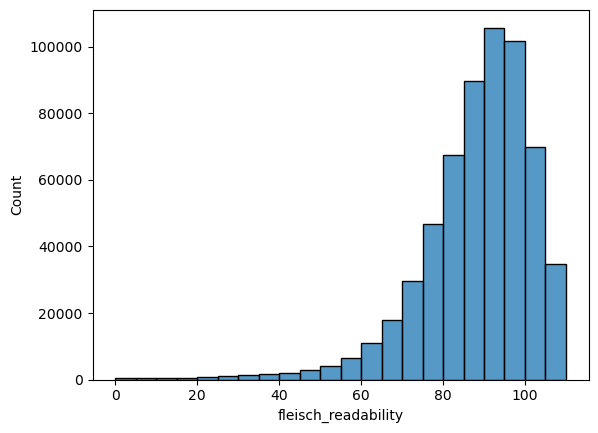

In [9]:
# constants = {"start": 206.835, "sentence": 1.015, "word": 84.6}
data["fleisch_readability"] = (
    206.835 - (data["sentence_length"] * 1.015) - (data["syllables_per_word"] * 84.6)
)
sns.histplot(data, x="fleisch_readability", binrange=(0, 110), binwidth=5)